# Water Use: Population vs Source by US County
We are going to look at groundwater vs surface water use using USA county-level data from 2015. 

I hypothesize that more populus counties will rely more heavily on groundwater than surface water. If true, this may be because what surface water exists is divided up between more people, or that surface water is more easily diverted for agriculture, or an unconsidered reason. 

Counties with 0% of the population served by surface water or 0% served by groundwater will not be considered. It is additionally unknown if individuals of a population can be served simultaneously by groundwater and surface water and therefore would be double-counted.

In [1]:
"""import libraries"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

The data, from 2015, is from USGS's ScienceBase-catalog. It was published in 2017 and last revised in 2018:

https://www.sciencebase.gov/catalog/item/get/5af3311be4b0da30c1b245d8

Citation:
Dieter, C.A., Linsey, K.S., Caldwell, R.R., Harris, M.A., Ivahnenko, T.I., Lovelace, J.K., Maupin, M.A., and Barber, N.L., 2018, Estimated Use of Water in the United States County-Level Data for 2015 (ver. 2.0, June 2018): U.S. Geological Survey data release, https://doi.org/10.5066/F7TB15V5.

The file is called "Estimated Use of Water in the United States County-Level Data for 2015"

In [2]:
"""Download the county water use data file"""

#with panda, use URL to download file
file_url = "https://www.sciencebase.gov/catalog/file/get/5af3311be4b0da30c1b245d8?f=__disk__29%2Fc0%2F51%2F29c051a5166ae254b942322f77b02edcda0822ac"


There are many more columns than we need here. For this analysis, we will use:

        TP-TotPop (county population by thousands),
        PS-SWPop (Public Supply population served by surface water in thousdands)
        PS-GWPop (Public Supply population served by surface water in thousdands)

See "Estimated_Use_of_Water_in_the_United_States_County-Level_Data_for_2015.xml" on the same USGS ScienceBase-catalog web page for metadata.

In [3]:
"""filter in only rows we want: 
    0, state, 
    2, county, 
    6, TP-TotPop (population by thousands), 
    7, PS-SWPop (Public Supply population served by surface water in thousdands)
    8, PS-GWPop (Public Supply population served by ground water in thousdands)

    Other columns that may be useful in the future:
        -12, TO-WGWFr (total groundwater fresh withdrawl (million gallons per day)), and 
        -9, TO-WSWFr (total fresh surface water withdrawls (million gallons per day))"""

#read in data file
Water15tot_df = pd.read_excel(file_url, sheet_name = "usco2015v2.0", header = 1, skiprows = (0), usecols=[0, 2, 6, 7, 8], na_values = "--")
Water15tot_df #should return file once you have URL and SHEET NAME!

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,STATE,COUNTY,TP-TotPop,PS-GWPop,PS-SWPop
0,AL,Autauga County,55.347,NaN,NaN
1,AL,Baldwin County,203.709,NaN,NaN
2,AL,Barbour County,26.489,NaN,NaN
3,AL,Bibb County,22.583,NaN,NaN
4,AL,Blount County,57.673,NaN,NaN
...,...,...,...,...,...
3218,PR,Yabucoa Municipio,35.082,NaN,NaN
3219,PR,Yauco Municipio,37.679,NaN,NaN
3220,VI,St. Croix County,49.250,11.768,16.144
3221,VI,St. John County,4.060,0.140,0.782


In [4]:
"""Exclude counties with 0% of the population served by surface water or 0% served by ground water"""

#drop counties we don't have data for 
Water15_df_nona = Water15tot_df.dropna()

#drop counties with population entirely depended on one source
# population is in thousdands, so dropping values == 0.000 indicates there should be at least one person dependent on the source
Water15_df_no0_SW = Water15_df_nona.drop(Water15_df_nona[Water15_df_nona['PS-SWPop'] == 0.000].index)
Water15_df_no0 = Water15_df_no0_SW.drop(Water15_df_no0_SW[Water15_df_no0_SW['PS-GWPop'] == 0.000].index)
Water15_df_no0

,STATE,COUNTY,TP-TotPop,PS-GWPop,PS-SWPop
98,AZ,Coconino County,139.097,103.701,23.336
99,AZ,Gila County,53.159,44.404,0.055
102,AZ,La Paz County,20.152,9.107,5.275
103,AZ,Maricopa County,4167.947,1005.956,3119.551
107,AZ,Pinal County,406.584,338.189,55.825
...,...,...,...,...,...
3139,WY,Uinta County,20.822,1.160,15.978
3141,WY,Weston County,7.234,5.283,0.046
3220,VI,St. Croix County,49.250,11.768,16.144
3221,VI,St. John County,4.060,0.140,0.782


Now we calculate SW/GW, defined as per county the population served by surface water (in thousands) divided by the population served by groundwater (in thousands).

The closer this value is to 0, the more the population is served by groundwater. The higher above 1, the more of the population is served by surface water. A value of 1 means there is an equal number of people served by groundwater and surface water.


In [5]:
Water15_df_no0["SW/GW"] = (Water15_df_no0['PS-SWPop']/Water15_df_no0['PS-GWPop'])*100
Water15_df_no0


,STATE,COUNTY,TP-TotPop,PS-GWPop,PS-SWPop,SW/GW
98,AZ,Coconino County,139.097,103.701,23.336,22.503158
99,AZ,Gila County,53.159,44.404,0.055,0.123863
102,AZ,La Paz County,20.152,9.107,5.275,57.922477
103,AZ,Maricopa County,4167.947,1005.956,3119.551,310.108096
107,AZ,Pinal County,406.584,338.189,55.825,16.507042
...,...,...,...,...,...,...
3139,WY,Uinta County,20.822,1.160,15.978,1377.413793
3141,WY,Weston County,7.234,5.283,0.046,0.870717
3220,VI,St. Croix County,49.250,11.768,16.144,137.185588
3221,VI,St. John County,4.060,0.140,0.782,558.571429


Due to the SW/GW method of calculation, as well as the deviation in county population, the data is best shown on a log-log plot (compare below).

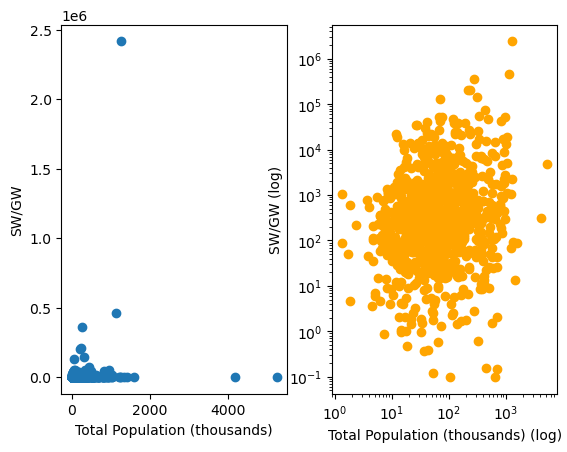

In [6]:
"""plot SW/GW twice as a function of the total population, once on a log-log plot"""

#create two subplots
fig, (ax1, ax2) = plt.subplots(1,2)

#first plot: data plotted on linear-scale axes
ax1.scatter(Water15_df_no0['TP-TotPop'], Water15_df_no0['SW/GW'])
ax1.set_xlabel("Total Population (thousands)")
ax1.set_ylabel("SW/GW")

#second plot: data plotted on log-scale axes
ax2.scatter(Water15_df_no0['TP-TotPop'], Water15_df_no0['SW/GW'], color='orange')#this color is definitely not orange
ax2.set_xlabel("Total Population (thousands) (log)")
ax2.set_ylabel("SW/GW (log)") # not sure why this label ends up in the real estate of the first plot
plt.xscale('log')
plt.yscale('log')

plt.show()

The log-log axes allow us to visualize the data better. This is interesting news given that the assignment was to do a linear regression.

### Linear Regression and Correlation Analyses of SW/GW and Population
A linear regression and a correlation analysis for the data is provided below:

SW/GW value = 40.833264846810664 * (County Population in thousands) + 704.6904755310752
Correlation coefficient = 0.14857838504193147


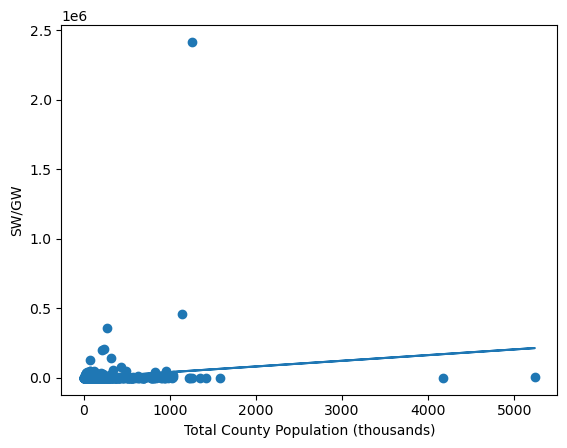

In [7]:
"""Perform linear regression and correlation analyses"""

#calculate regession line
m, b = np.polyfit(Water15_df_no0["TP-TotPop"], Water15_df_no0["SW/GW"], 1)
print("SW/GW value =", m, "* (County Population in thousands) +", b)

#calculate correlation coefficient
Water15_corr = Water15_df_no0["TP-TotPop"].corr(Water15_df_no0["SW/GW"])
print("Correlation coefficient =", Water15_corr)

# plot the data with the regression line

fig, ax = plt.subplots()
ax.scatter(Water15_df_no0['TP-TotPop'], Water15_df_no0['SW/GW'])
ax.plot(Water15_df_no0['TP-TotPop'], m * Water15_df_no0['TP-TotPop'] + b)
ax.set_xlabel("Total County Population (thousands)")
ax.set_ylabel("SW/GW")
plt.show()

With a correlation coefficient of 0.15, this may mean there is not a strong correlation between population of a county and the ratio of that county's population served by fresh water to groundwater.

Or at least... not a linear correlation. 

### Performing Linear Regression and Correlation Analyses of log-scaled SW/GW and Population

First we'll create a new dataframe with two new columns: log(SW/GW), the log of the SW/GW values, and log(Pop), the log of the TP-TotPop values. 

In [14]:
Water15_df_log = Water15_df_no0
Water15_df_log["log(SW/GW)"] = np.log(Water15_df_log['SW/GW'])
Water15_df_log["log(Pop)"] = np.log(Water15_df_log['TP-TotPop'])
#Water15_df_log

Then we can repeat our linear regression and correlation analyses with this transformed data. 

Log SW/GW value = 0.3159586173839354 * Log(County Population in thousands) + 4.3574965484825166
Correlation coefficient = 0.1767644225338839


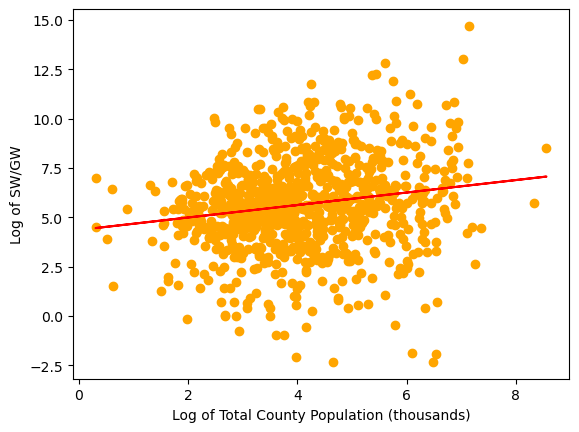

In [16]:
"""Perform linear regression and correlation analyses"""

#calculate regession line
m, b = np.polyfit(Water15_df_log["log(Pop)"], Water15_df_log["log(SW/GW)"], 1)
print("Log SW/GW value =", m, "* Log(County Population in thousands) +", b)

#calculate correlation coefficient
Water15_corr2 = Water15_df_log["log(Pop)"].corr(Water15_df_log["log(SW/GW)"])
print("Correlation coefficient =", Water15_corr2)

# plot the data with the regression line

fig, ax = plt.subplots()
ax.scatter(Water15_df_log["log(Pop)"], Water15_df_log["log(SW/GW)"], color = 'orange')
ax.plot(Water15_df_log["log(Pop)"], m * Water15_df_log["log(Pop)"] + b, color = 'red')
ax.set_xlabel("Log of Total County Population (thousands)")
ax.set_ylabel("Log of SW/GW")
plt.show()

The data may look better, but the correlation coefficient of the log data is only bumped up to 0.18. This may indicate there is not a strong correlation between the log of population of a county and the ratio of that county's population served by fresh water to groundwater either.

Additionally, a slight positive correlation between these two values further nullifies the original hypothesis. As SW/GW increases, it indicates more use of surface water than groundwater. If population increase correlates with SW/GW increase, it indicates counties of larger population use more surface water. This may be because of the phenomenon of populations settling near surface water sources. An additional factor may have been the removal of counties dependent on only one of the two water sources.

